# Unit 2 Lesson 4 Challenge: make your own regression model

In [21]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
from sklearn import preprocessing
import math
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
fbi_data = pd.read_csv('offenses_known_to_law_enforcement1.csv')

### Exploring the data

In [3]:
fbi_data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan


In [4]:
fbi_data.describe()

,Murder and nonnegligent manslaughter,Rape (revised definition)1,Arson3
count,348.000,0.000,187.000
mean,1.566,nan,1.872
std,18.304,nan,10.693
min,0.000,nan,0.000
25%,0.000,nan,0.000
50%,0.000,nan,0.000
75%,0.000,nan,1.000
max,335.000,nan,132.000


### Data Cleaning

In [5]:
fbi_data = fbi_data.drop(['Rape\n(revised\ndefinition)1'], axis =1)

In [6]:
fbi_data.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape2', 'Robbery', 'AggAssault', 'PropCrime', 'Burglary', 'Larceny', 'AutoTheft', 'Arson']

In [7]:
fbi_data = fbi_data.fillna(0)

In [8]:
# Need to convert the column's data from strings

fbi_data['Arson'] = fbi_data['Arson'].astype(int)
fbi_data['Robbery'] = fbi_data['Robbery'].str.replace(',', '')
fbi_data['Population'] = fbi_data['Population'].str.replace(',', '')
fbi_data['Robbery'] = fbi_data['Robbery'].astype(int)
fbi_data['Population'] = fbi_data['Population'].astype(int)
fbi_data['PropCrime'] = fbi_data['PropCrime'].str.replace(',', '')
fbi_data['Larceny'] = fbi_data['Larceny'].str.replace(',', '')
fbi_data['AutoTheft'] = fbi_data['AutoTheft'].str.replace(',', '')
fbi_data['Rape2'] = fbi_data['Rape2'].str.replace(',', '')
fbi_data['PropCrime'] = fbi_data['PropCrime'].astype(int)
fbi_data['Rape2'] = fbi_data['Rape2'].astype(int)

###  Creating a new feature and fitting the model

In [9]:
fbi_data['Rape2'] = fbi_data['Rape2'].apply(lambda x: 1 if x >= 1 else 0)
fbi_data['Robbery'] = fbi_data['Robbery'].apply(lambda x: 1 if x >= 1 else 0)
new_fbi_data_col = ["Population", "Rape2", "PropCrime", 'Robbery']
new_fbi_data = fbi_data[new_fbi_data_col]

In [10]:
regr = linear_model.LinearRegression()
Y = new_fbi_data['PropCrime'].values.reshape(-1, 1)
X = new_fbi_data[["Population", "Rape2", "Robbery"]]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.69233652e-02   2.63794701e+02   1.14261013e+02]]

Intercept: 
 [-62.74385072]

R-squared:
0.992999653368


In [11]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = new_fbi_data['PropCrime']
predicted = predicted.astype(float)
actual = actual.astype(float)
# Calculate the error, also called the residual.
residual = actual - predicted

### Verifiying the model meets Multivariable criteria

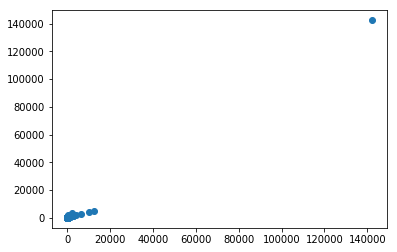

In [12]:
plt.scatter(actual, predicted)
plt.show()

In [13]:
new_data = new_fbi_data[(np.abs(stats.zscore(new_fbi_data)) <= 1.5).all(axis=1)]
new_data = np.sqrt(new_fbi_data)
Y = new_data['PropCrime'].values.reshape(-1, 1)
X = new_data[["Population", "Rape2", "Robbery"]]
regr.fit(X, Y)
new_predicted = regr.predict(X).ravel()
new_actual = new_data['PropCrime']
# Calculate the error, also called the residual.
new_res = new_actual - new_predicted
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.13196252  3.72280247  2.70009   ]]

Intercept: 
 [-2.53787641]

R-squared:
0.941442196105


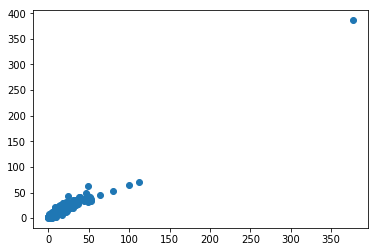

In [14]:
# the model has a linear relationship
plt.scatter(new_actual, new_predicted)
plt.show()

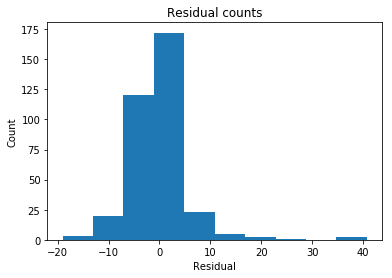

In [15]:
plt.hist(new_res)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')

plt.show()

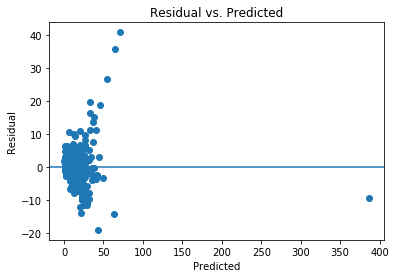

In [16]:
# the errors are fairly consistent for the new predicted values
plt.scatter(new_predicted, new_res)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [17]:
# there is low correlation between the features
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Rape2,Robbery
Population,1.000,0.277,0.252
Rape2,0.277,1.000,0.471
Robbery,0.252,0.471,1.000


In [22]:
linear_formula = 'new_data.PropCrime ~ Population+Rape2+Robbery'
lm = smf.ols(formula= linear_formula, data=new_data).fit()

In [23]:
lm.params

Intercept    -2.538
Population    0.132
Rape2         3.723
Robbery       2.700
dtype: float64

In [24]:
# p-values are under .05
lm.pvalues

Intercept    0.000
Population   0.000
Rape2        0.000
Robbery      0.000
dtype: float64

In [25]:
# r-squared is quite high
lm.rsquared

0.94144219610517776

In [26]:
lm.conf_int()

,0,1
Intercept,-3.530,-1.546
Population,0.128,0.136
Rape2,2.310,5.135
Robbery,1.290,4.110


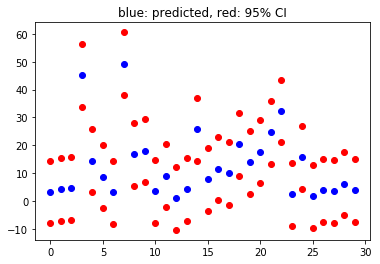

In [30]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:30], 'o', color='r')
plt.plot(iv_l[0:30], 'o', color='r')
plt.plot(lm.fittedvalues[0:30], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()